In [456]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from numpy import cov
import seaborn as sns
import sklearn.cluster as cluster   

#read the dataset 
df_CO2emission = pd.read_excel("CO2 emissions (kt).xls")
df_CO2emission_gF_consumption = pd.read_excel("CO2 emissions from gaseous fuel consumption (kt) .xls")
df_CO2emission_lF_consumption = pd.read_excel("CO2 emissions from liquid fuel consumption (kt) .xls")
df_CO2emission_sF_consumption = pd.read_excel("CO2 emissions from solid fuel consumption (% of total).xls")
df_ForestArea = pd.read_excel("Forest area.xls")
df_Population = pd.read_excel("Population growth.xls")

In [457]:
#Select different countries from CO2 Emission
slt_UK_CO2     = df_CO2emission.loc[df_CO2emission['Country Name'] == 'United Kingdom']
slt_China_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'China']
slt_Spain_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'Spain']
slt_Poland_CO2 = df_CO2emission.loc[df_CO2emission['Country Name'] == 'Poland']
slt_World_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'World']
slt_USA_CO2  = df_CO2emission.loc[df_CO2emission['Country Name'] == 'United States']

In [458]:
#Select different countries forest area
slt_UK_FA     = df_ForestArea.loc[df_ForestArea['Country Name'] == 'United Kingdom']
slt_China_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'China']
slt_Spain_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'Spain']
slt_Poland_FA = df_ForestArea.loc[df_ForestArea['Country Name'] == 'Poland']
slt_World_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'World']
slt_USA_FA  = df_ForestArea.loc[df_ForestArea['Country Name'] == 'United States']

In [459]:
slt_UK_tr     = slt_UK_CO2.transpose() #transpose the raw with country name United Kingdom
slt_China_tr  = slt_China_CO2.transpose() #transpose the raw with country name China
slt_Spain_tr  = slt_Spain_CO2.transpose() #transpose the raw with country name Spain
slt_Poland_tr = slt_Poland_CO2.transpose() #transpose the raw with country name Poland
slt_USA_tr    = slt_USA_CO2.transpose()
slt_World_CO2_tr  = slt_World_CO2.transpose() #transpose the world data

In [460]:
# transpose the forestarea data of each country and world 
slt_UK_FA_tr    = slt_UK_FA.transpose()
slt_China_FA_tr = slt_China_FA.transpose()
slt_Spain_FA_tr = slt_Spain_FA.transpose()
slt_Poland_FA_tr= slt_Poland_FA.transpose()
slt_World_FA_tr = slt_World_FA.transpose()
slt_USA_FA_tr   = slt_USA_FA.transpose()

In [461]:
def drop_raw(df):
    df.drop(labels=["Country Code","Indicator Name", "Indicator Code",'2019','2020'], 
                               inplace = True, axis = 0) # drop the raws
    return df

In [462]:
drop_raw(slt_USA_tr)
drop_raw(slt_UK_tr)
drop_raw(slt_China_tr)
drop_raw(slt_Spain_tr)


,70
Country Name,Spain
1960,48928.781
1961,53677.546
1962,60054.459
1963,58822.347
1964,64410.855
1965,71117.798
1966,77729.399
1967,86519.198
1968,97157.165


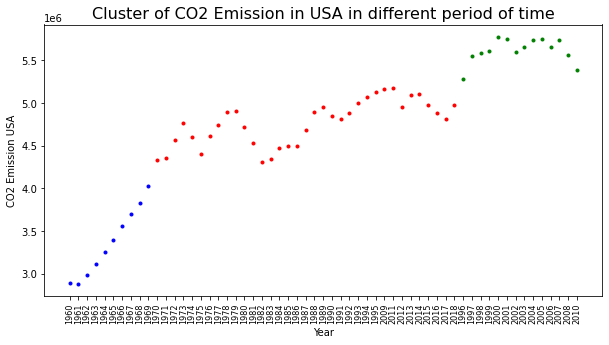

In [463]:
Clu_slt_USA_tr = slt_USA_tr
#set the header
new_header = Clu_slt_USA_tr.iloc[0] #grab the first row for the header
Clu_slt_USA_tr = Clu_slt_USA_tr[1:] #take the data less the header row
Clu_slt_USA_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_USA_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_USA_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of CO2 Emission in USA in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission USA")
plt.show()

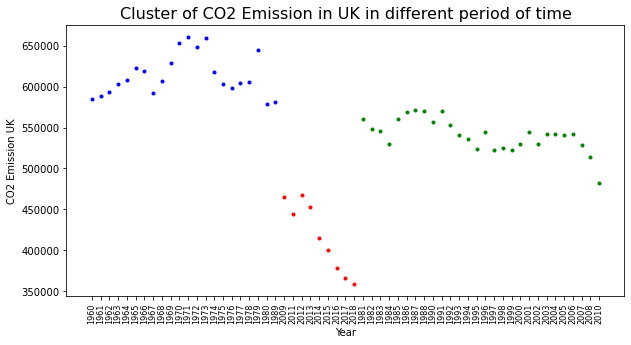

In [464]:
Clu_slt_UK_tr = slt_UK_tr
#set the header
new_header = Clu_slt_UK_tr.iloc[0] #grab the first row for the header
Clu_slt_UK_tr = Clu_slt_UK_tr[1:] #take the data less the header row
Clu_slt_UK_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_UK_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_UK_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of CO2 Emission in UK in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission UK")
plt.show()

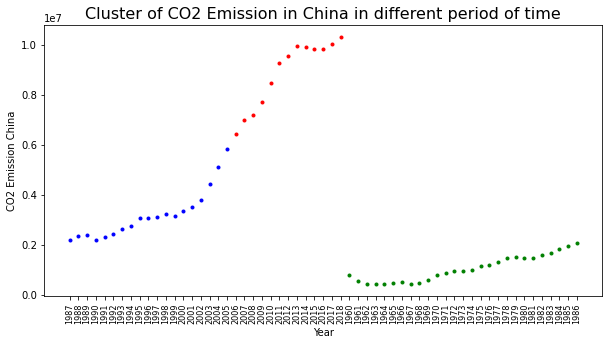

In [467]:
Clu_slt_China_tr = slt_China_tr
#set the header
new_header = Clu_slt_China_tr.iloc[0] #grab the first row for the header
Clu_slt_China_tr = Clu_slt_China_tr[1:] #take the data less the header row
Clu_slt_China_tr.columns = new_header
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Clu_slt_China_tr) 
       # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres
# plot using the labels to select colour
plt.figure(figsize=(10.0,5.0))
col = ["blue", "red", "green","purple"]
for l in range(0,3):     # loop over the different labels
    plt.plot(Clu_slt_China_tr.iloc[: , :1][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
#for ic in range(3):
#    xc, yc = cen[ic,:]
#    plt.plot(xc, yc, "dk", markersize=10)

plt.title("Cluster of CO2 Emission in China in different period of time",fontsize=16) 
plt.xticks(rotation=90, size=8)
plt.xlabel("Year")
plt.ylabel("CO2 Emission China")
plt.show()

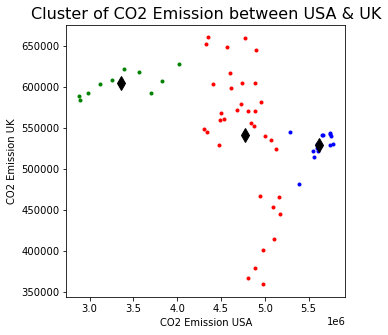

In [465]:
x = slt_USA_tr.drop(slt_USA_tr.index[[0]])
y = slt_UK_tr.drop(slt_UK_tr.index[[0]])
df_USA_UK_CO2 = pd.concat([x, y], axis=1) 
########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(df_USA_UK_CO2)        # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres


# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Cluster of CO2 Emission between USA & UK",fontsize=16)  
plt.xlabel("CO2 Emission USA")
plt.ylabel("CO2 Emission UK")
plt.show()

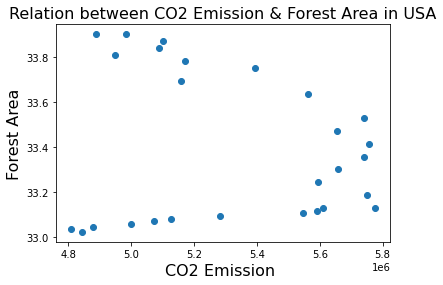

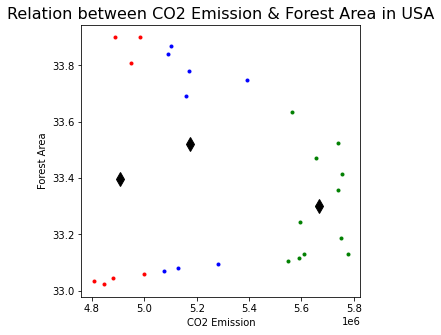

In [466]:
slt_USA_FA_tr.drop(labels=["Country Code","Indicator Name", "Indicator Code",'2019','2020'], 
                               inplace = True, axis = 0) # drop the raws

###################### Relation between USA Forest area & CO2 Emission #######################
# drop the unnecessary fields
data1_USA_CO2 = slt_USA_tr.drop(slt_USA_tr.index[range(31)]) 
data1_USA_CO2 = data1_USA_CO2.drop(data1_USA_CO2.index[[-2, -1]])
data2_USA_FA = slt_USA_FA_tr.drop(slt_USA_FA_tr.index[range(31)])
data2_USA_FA = data2_USA_FA.drop(data2_USA_FA.index[[-2, -1]])

# plot
plt.scatter(data1_USA_CO2,data2_USA_FA)
plt.title("Relation between CO2 Emission & Forest Area in USA",fontsize=16)
plt.xlabel("CO2 Emission ",fontsize=16)
plt.ylabel("Forest Area",fontsize=16)
plt.show()

#Concantenate the each data with different counties in colomnwise.
Concantenate_USA_FA = pd.concat([data1_USA_CO2, data2_USA_FA], axis=1)  
Concantenate_USA_FA

########### Clustering###############

kmeans = cluster.KMeans(n_clusters=3)  # set up the clusterer, 3 expected clusters
kmeans.fit(Concantenate_USA_FA)        # Fit the data, results are stored in the kmeans object
labels = kmeans.labels_             # labels is the number of the associated clusters of (x,y) points
cen = kmeans.cluster_centers_       # extract the estimated cluster centres


# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red", "green"]
for l in range(0,3):     # loop over the different labels
    plt.plot(data1_USA_CO2[labels==l], data2_USA_FA[labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.title("Relation between CO2 Emission & Forest Area in USA",fontsize=16)  
plt.xlabel("CO2 Emission")
plt.ylabel("Forest Area")
plt.show()